## Final Project Submission

Please fill out:
* Student name: Andrew Hotchkiss
* Student pace: part time
* Scheduled project review date/time: 6/9 from 1200-1245pm
* Instructor name: James Irving
* Blog post URL: 


In [1003]:
# Your code here - remember to use markdown cells for comments as well!

In [1004]:
%ls

CONTRIBUTING.md             module1_project_rubric.pdf
LICENSE.md                  student.ipynb
README.md                   zippedData/
awesome.gif


In [1005]:
import os

In [1006]:
os.listdir('zippedData/')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [1007]:
import glob


In [1008]:
file_list = glob.glob('zippedData/*') #make a list of all the files with relative path name 'zippedData'
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [1009]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_0 = pd.read_csv(file_list[0])
df_1 = pd.read_csv(file_list[1])
df_2 = pd.read_csv(file_list[2])
df_3 = pd.read_csv(file_list[3])
df_4 = pd.read_csv(file_list[4])
df_5 = pd.read_csv(file_list[5], sep='\t', encoding='latin')
df_6 = pd.read_csv(file_list[6])
df_7 = pd.read_csv(file_list[7], sep='\t', encoding='latin')
df_8 = pd.read_csv(file_list[8])
df_9 = pd.read_csv(file_list[9])
df_10 = pd.read_csv(file_list[10])


Let's look at data sets 8 and 9 a little closer. They both contain financial data. To compare them, let's display them on top of each other:

In [1010]:
display(df_8, df_9)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Both of these tables contain information about foreign and domestic gross totals for movies. df_8 appears to be much more complete, and provides more financial information about a particular movie. 

One of the questions we hope to answer is which movie achieved the highest gross profit? Put another way, which movie has the largest positive delta between production budget and worldwide gross?

Here's the basic math equation: 

"worldwide_gross" - "production_budget" = gross_profit margin (in $$)

To calculate this per movie (in order to be able to rank them), we need to create a new column which performs the above calculation. 

In [1011]:
#first let's figure out what data types are in df_8...
df_8.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

## Need to convert our target columns from objects (aka "strings") to integers or floats...let's go with integers



In [1012]:
import re

df_8[df_8.columns[3:]] = df_8[df_8.columns[3:]].replace('[\$,]', '', regex=True).astype(int)

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1013]:
#Now we can do a little statistical analysis...

df_8["production_budget"].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [1015]:
#THAT'S A HUGE STD FOR PRODUCTION BUDGET...WHICH MAKES SENSE

In [1016]:
#CREATE GROSS PROFIT COLUMN
df_8['gross_profit'] = df_8["worldwide_gross"] - df_8["production_budget"]

df_8['gross_profit'].astype("int", copy=False)

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: gross_profit, Length: 5782, dtype: int64

In [1018]:
#lets look for duplicates

df_8_dups = df_8[df_8.duplicated('movie', keep=False)]

df_8_dups

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006
39,40,"Dec 14, 2005",King Kong,207000000,218080025,550517357,343517357
50,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,825491110
64,65,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,214953905
...,...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,134000,4000000,8000000,7866000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064
5677,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,10890000
5699,100,"Aug 30, 1972",The Last House on the Left,87000,3100000,3100000,3013000


In [1019]:
#lets remove the duplicates
df_8.drop_duplicates(subset="movie", keep=False, inplace=True)


In [1020]:
df_8.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [1022]:
df_8 = df_8.sort_values('gross_profit', ascending=False)
df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


In [1023]:
#new df_8 has only 5617 rows...let's confirm duplicates have been removed by subtracting the duplicate rows
#from the original number of rows to see if we get the new number of rows above (5617 rows)
5782 - 165 == 5617

True

In [1024]:
#we're good to go, all duplicates have been removed! Let's look at Naan values

df_8.isnull().values.any()

False

## Plot the highest grossing movies of all time (not adjusted for inflation)

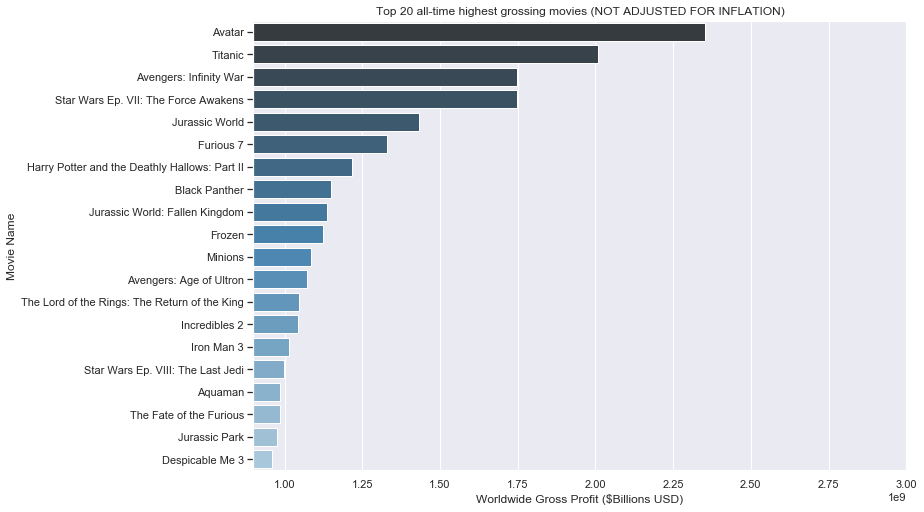

In [1025]:
#ONLY TAKE TOP 20 MOVIES OF ALL TIME
top_20 = df_8.head(20)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style({'ytick.left': True})

ax = sns.barplot(x="gross_profit", y="movie", data=top_20, palette="Blues_d") 
ax.set_xlim(900000000,3000000000)
#ax.set_xticks(range(80, 300))
ax.set(xlabel='Worldwide Gross Profit ($Billions USD)', ylabel='Movie Name'
, title="Top 20 all-time highest grossing movies (NOT ADJUSTED FOR INFLATION)");

## Change all data to only last 10 years of movies

In [1026]:
df_8[['month_day', 'release_year']] = df_8['release_date'].str.split(', ', expand=True)

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Dec 18,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,Dec 19,1997
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015
...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,Apr 27,2001
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,Jun 14,2019
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,Mar 11,2011
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,Dec 31,2020


In [1027]:
df_8 = df_8[df_8['release_year'] > '2010']

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011
...,...,...,...,...,...,...,...,...,...
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000,Dec 13,2017
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,Jun 14,2019
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,Mar 11,2011
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,Dec 31,2020


In [1028]:
#CALCULATE GROSS PROFIT PERCENT AND MAKE A NEW COLUMN
df_8['gross_profit_percent'] = (df_8['gross_profit'] - df_8['production_budget'])/ df_8['production_budget'] * 100

df_8.head(20)

/Users/andrewhotchkiss/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year,gross_profit_percent
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018,482.711400
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015,471.016739
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015,566.909239
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015,599.327786
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011,873.354526
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,Feb 16,2018,474.129112
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jun 22,2018,568.101646
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,Nov 22,2013,648.313273
672,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,1086336173,Jul 10,2015,1368.021855
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May 1,2015,224.384139


In [1029]:
df_8.reset_index(drop=True, inplace=True) #reset the index

In [1032]:
#TIME TO CHECK OUT df_9
df_9.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1033]:
#REMOVE DUPLICATES
df_9.drop_duplicates("title", keep=False, inplace=True)
df_9

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [1034]:
#FIND NULL VALUES

df_9_null = df_9.columns[df_9.isnull().any()]
df_9[df_9_null].isnull().sum()

studio               5
domestic_gross      28
foreign_gross     1349
dtype: int64

In [1035]:
#ALMOST HALF OF FOREIGN GROSS IS NULL VALUES...LET'S JUST REMOVE IT
df_9.drop('foreign_gross', axis=1, inplace=True)

df_9.head()


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [1036]:
#RENAME THE COLUMNS IN df_9 TO MATCH df_8
df_9.rename(columns={'title': 'movie'}, inplace=True)

df_9

,movie,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [1037]:
#JOIN df_8 and df_9 ON 'title'...USING AN INNER JOIN TO LIMIT NULL VALUES AFTER JOIN #
df_finance = df_8.merge(df_9, how='left', on="movie")

display(df_finance.head(5), df_finance.shape)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,month_day,release_year,gross_profit_percent,studio,domestic_gross_y,year
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018,482.711400,BV,678800000.0,2018.0
1,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015,471.016739,NaN,NaN,NaN
2,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015,566.909239,Uni.,652300000.0,2015.0
3,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015,599.327786,Uni.,353000000.0,2015.0
4,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011,873.354526,NaN,NaN,NaN


(1870, 13)

In [1038]:
#DROP UNNECESSARY COLUMNS LEFT OVER FROM THE JOIN
df_finance.drop(['id', 'domestic_gross_y', 'year', 'month_day'], axis=1, inplace=True)

In [1039]:
df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,BV
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Uni.
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Uni.
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN


In [1040]:
#RE-CREATE THE 'foreign_gross' COLUMN USING df_8 DATA IN CASE WE NEED IT LATER
df_finance['foreign_gross'] = df_finance['worldwide_gross'] - (df_finance['domestic_gross_x'] > 0)


In [1041]:
df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,BV,2048134199
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,2053311219
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Uni.,1648854863
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Uni.,1518722793
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,1341693156


In [1046]:
df_finance['release_year'].dtype

dtype('O')

In [1047]:
#ENSURE 'release_year' IS AN INT SO WE CAN PLOT PROPERLY LATER
df_finance['release_year'].astype(int, copy=False)


0       2018
1       2015
2       2015
3       2015
4       2011
        ... 
1865    2017
1866    2019
1867    2011
1868    2020
1869    2019
Name: release_year, Length: 1870, dtype: int64

In [883]:
df_finance['gross_profit'].describe

<bound method NDFrame.describe of 0       2351345279
1       2008208395
2       1748134200
3       1747311220
4       1433854864
           ...    
5612     -94635231
5613    -106900000
5614    -110450242
5615    -150000000
5616    -200237650
Name: gross_profit, Length: 5617, dtype: int64>

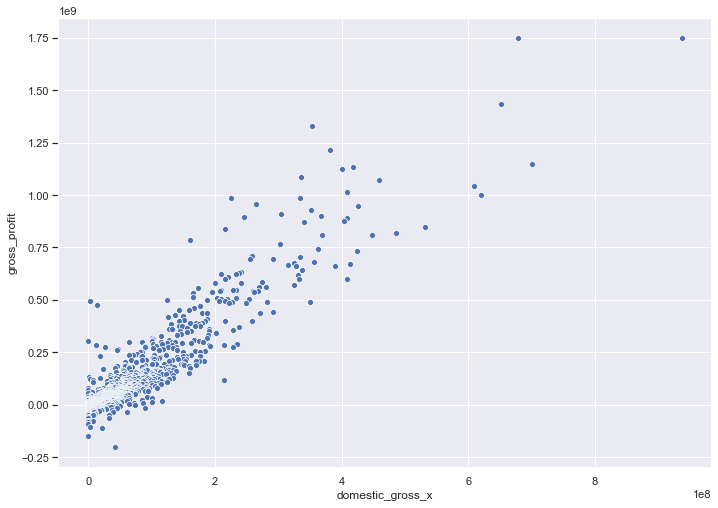

In [1049]:
#LET'S SEE IF DOMESTIC GROSS CORRELATES TO GROSS PROFIT...I'D EXPECT YES
ax = sns.scatterplot(x='domestic_gross_x', y='gross_profit', data=df_finance)

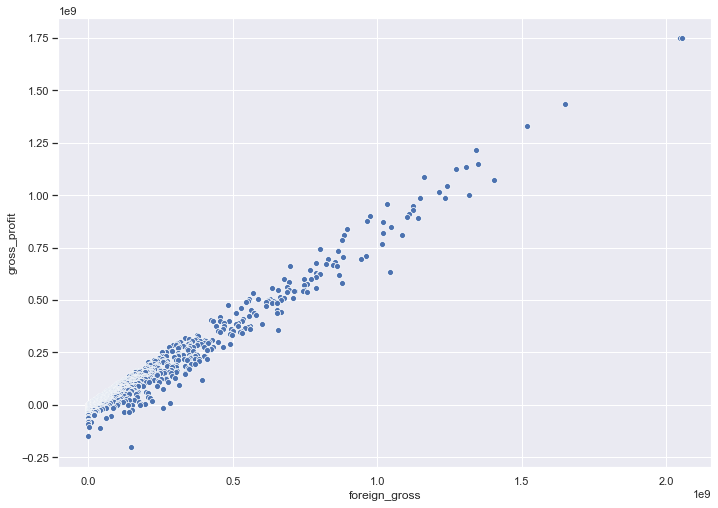

In [1050]:
#FOREIGN GROSS?
ax = sns.scatterplot(x='foreign_gross', y='gross_profit', data=df_finance)

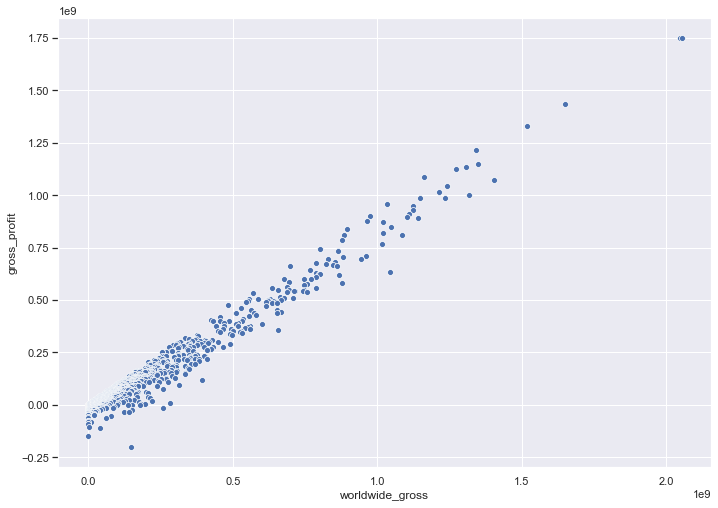

In [1060]:
#WORLDWIDE GROSS?
ax = sns.scatterplot(x='worldwide_gross', y='gross_profit', data=df_finance)

## Let's see what the odds are of even being profitable in the movie industry.

To do this, we'll look at overall gross profits for the last 10 years, then break up the markets into total, domestic only, and foreign only.

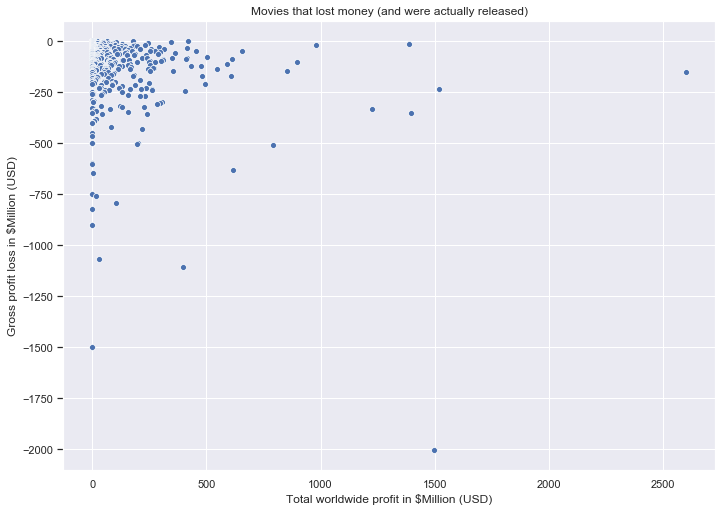

In [1063]:
#PLOT ALL THE MOVIES THAT LOST MONEY BUT STILL HAD A NET POSITIVE WORLDWIDE GROSS (MEANING THEY WERE RELEASED)

x = df_finance['worldwide_gross'] * (.00001)
y = df_finance['gross_profit'][df_finance['gross_profit'] < 0] * (.00001)

ax = sns.scatterplot(x, y, data=df_finance)

ax.set(xlabel='Total worldwide profit in $Million (USD)', 
       ylabel='Gross profit loss in $Million (USD)', 
      title='Movies that lost money (and were actually released)');


In [1065]:
#WHAT PERCENT OF ALL MOVIES IN LAST 10 YEARS LOST MONEY? 

#CAPTURE ONLY MOVIES THAT LOST MONEY
df_gross_neg = df_finance['gross_profit'].loc[df_finance['gross_profit'] < 0].count()

#CALCULATE PERCENT OF MOVIES THAT WHERE SHOWN IN THE US THAT LOST MONEY
d_loss_percent = np.round((df_gross_neg / (df_finance['movie'].count()) * 100), 2)

print("Total number of movies that lost money: {}, ".format(df_gross_neg), "Percent of total: {}%".format(d_loss_percent))


Total number of movies that lost money: 753,  Percent of total: 40.27%


## Domestic Numbers

In [1066]:
#HOW MANY DOMESTIC MOVIES LOST MONEY THAT WERE ACTUALLY RELEASED
df_gross_dom_only = df_finance.loc[(df_finance['domestic_gross_x'] == df_finance['worldwide_gross'])
                                             & (df_finance['domestic_gross_x'] > 0)]

df_gross_neg_1 = df_finance.loc[df_finance['gross_profit'] < 0]

df_dom_loss = df_gross_dom_only.merge(df_gross_neg_1, on='movie', how='inner')

#DOUBLE-CHECK FOR DUPLICATES
df_dom_loss.drop_duplicates('movie', keep='last', inplace=True)

df_dom_loss.head()

,release_date_x,movie,production_budget_x,domestic_gross_x_x,worldwide_gross_x,gross_profit_x,release_year_x,gross_profit_percent_x,studio_x,foreign_gross_x,release_date_y,production_budget_y,domestic_gross_x_y,worldwide_gross_y,gross_profit_y,release_year_y,gross_profit_percent_y,studio_y,foreign_gross_y
0,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012,-149.066667,NaN,4583,"Jan 13, 2012",9000,4584,4584,-4416,2012,-149.066667,NaN,4583
1,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,-186.862963,NaN,3546,"Jan 27, 2017",27000,3547,3547,-23453,2017,-186.862963,NaN,3546
2,"Feb 11, 2011",Raymond Did It,40000,3632,3632,-36368,2011,-190.920000,NaN,3631,"Feb 11, 2011",40000,3632,3632,-36368,2011,-190.920000,NaN,3631
3,"Jul 25, 2014",Happy Christmas,70000,30312,30312,-39688,2014,-156.697143,NaN,30311,"Jul 25, 2014",70000,30312,30312,-39688,2014,-156.697143,NaN,30311
4,"Mar 21, 2014",Cheap Thrills,100000,59424,59424,-40576,2014,-140.576000,NaN,59423,"Mar 21, 2014",100000,59424,59424,-40576,2014,-140.576000,NaN,59423


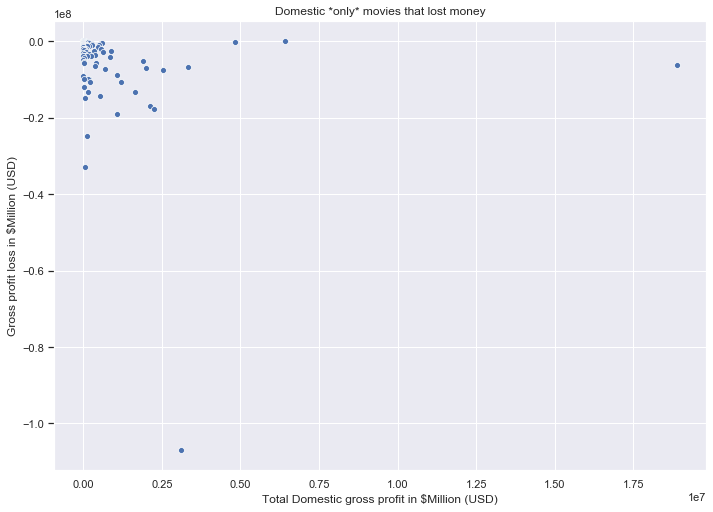

In [1067]:
#PLOT HOW MANY MOVIES ONLY SHOWN DOMESTICALLY LOST MONEY?

x = df_dom_loss['domestic_gross_x_x']

y = df_dom_loss['gross_profit_x']

ax = sns.scatterplot(x, y, data=df_dom_loss)

ax.set(xlabel='Total Domestic gross profit in $Million (USD)', 
       ylabel='Gross profit loss in $Million (USD)', 
      title='Domestic *only* movies that lost money');

In [1072]:
#CALCUALTE TOTAL DOMESTIC FILMS THAT LOST MONEY IN LAST 10 YEARS 
#CALCULATE THE PERCENT OF ALL DOMESTIC MOVIES THAT LOST MONEY 

#CAPTURE MOVIES THAT WERE ONLY SHOWN IN THE USA AND LOST MONEY

d_loss_d = np.round((df_dom_loss['movie'].count()) / (df_gross_dom_only['movie'].count()) * 100, 2)

d_loss_n = df_dom_loss['movie'].count()

print("Total movies only released domestically that lost money: {}, ".format(d_loss_n), "Percent of total domestic only: {}%".format(d_loss_d))


Total movies only released domestically that lost money: 112,  Percent of total domestic only: 84.21%


## Foreign Numbers

In [1073]:
#LET'S CALCULATE HOW MANY FOREIGN MOVIES LOST MONEY

#CAPTURE FOREIGN MOVIES THAT WERE RELEASED, BUT ONLY ABROAD (OUTSIDE U.S.)
df_gross_for_only = df_finance.loc[(df_finance['domestic_gross_x'] == 0) & (df_finance['foreign_gross'] > 0)]

df_gross_neg_1 = df_finance.loc[df_finance['gross_profit'] < 0]

df_for_loss = df_gross_for_only.merge(df_gross_neg_1, on='movie', how='inner')

#DOUBLE-CHECK FOR DUPLICATES
df_for_loss.drop_duplicates('movie', keep='last', inplace=True)

df_for_loss.head()

,release_date_x,movie,production_budget_x,domestic_gross_x_x,worldwide_gross_x,gross_profit_x,release_year_x,gross_profit_percent_x,studio_x,foreign_gross_x,release_date_y,production_budget_y,domestic_gross_x_y,worldwide_gross_y,gross_profit_y,release_year_y,gross_profit_percent_y,studio_y,foreign_gross_y
0,"Dec 31, 2011",Absentia,70000,0,8555,-61445,2011,-187.778571,NaN,8555,"Dec 31, 2011",70000,0,8555,-61445,2011,-187.778571,NaN,8555
1,"Dec 31, 2013",Speak No Evil,150000,0,32927,-117073,2013,-178.048667,NaN,32927,"Dec 31, 2013",150000,0,32927,-117073,2013,-178.048667,NaN,32927
2,"Dec 31, 2015",Lumea e a mea,168000,0,29678,-138322,2015,-182.334524,NaN,29678,"Dec 31, 2015",168000,0,29678,-138322,2015,-182.334524,NaN,29678
3,"Mar 24, 2015",Along the Roadside,250000,0,3234,-246766,2015,-198.706400,NaN,3234,"Mar 24, 2015",250000,0,3234,-246766,2015,-198.706400,NaN,3234
4,"Mar 31, 2015",Viskningar och rop,400000,0,9071,-390929,2015,-197.732250,NaN,9071,"Mar 31, 2015",400000,0,9071,-390929,2015,-197.732250,NaN,9071


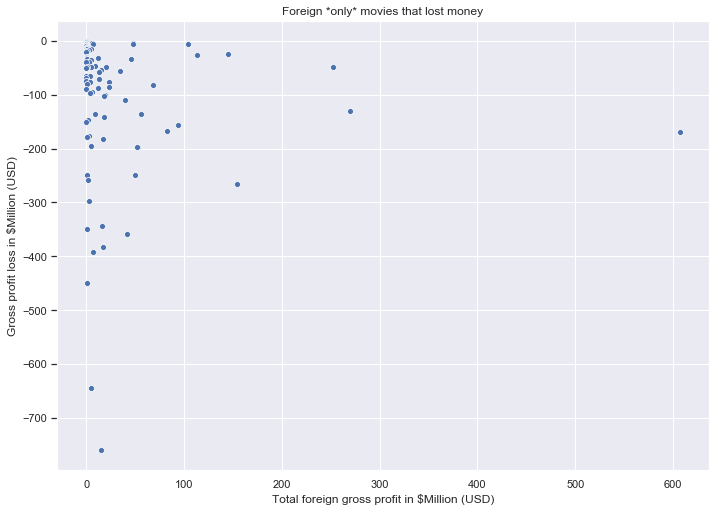

In [1079]:
#PLOT HOW MANY FOREIGN MOVIES THAT DID NOT SHOW IN THE U.S. LOST MONEY

x = df_for_loss['foreign_gross_x'] * (.00001) 

y = df_for_loss['gross_profit_x'][df_for_loss['gross_profit_x'] < 0] * (.00001)

ax = sns.scatterplot(x, y, data=df_for_loss)

ax.set(xlabel='Total foreign gross profit in $Million (USD)', 
       ylabel='Gross profit loss in $Million (USD)', 
      title='Foreign *only* movies that lost money');


In [1084]:
#CALCUALTE TOTAL FOREIGN ONLY FILMS THAT LOST MONEY IN LAST 10 YEARS 
#CALCULATE THE PERCENT OF ALL FOREIGN MOVIES THAT LOST MONEY 

#CAPTURE MOVIES THAT WERE ONLY OVERSEAS AND LOST MONEY

f_loss_percent = np.round((df_for_loss['movie'].count()) / (df_gross_for_only['movie'].count()) * 100, 2)

f_loss_n = df_for_loss['movie'].count()

print("Total 'foreign only' movies that lost money: {}, ".format(f_loss_n), 
      "Percent total of 'foreign only' that lost money: {}%".format(f_loss_percent))


Total 'foreign only' movies that lost money: 96,  Percent total of 'foreign only' that lost money: 78.05%


## As you can see above, don't make only foreign films!!

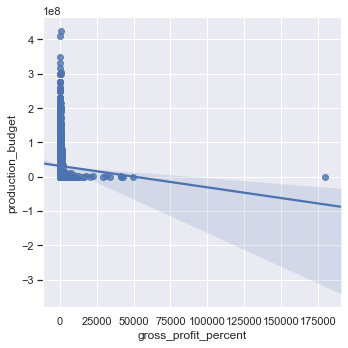

In [895]:
g = sns.lmplot('gross_profit_percent','production_budget', df_finance)
fig = g.fig
axes = fig.get_axes()

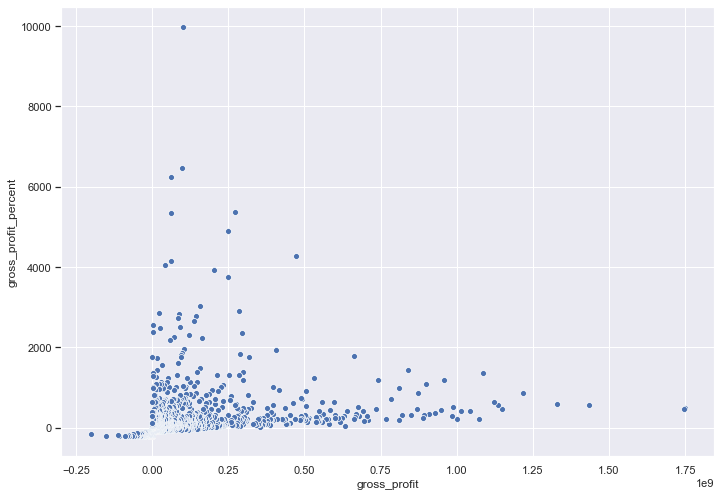

In [1094]:
#REMOVE THE BIGGEST OUTLIER (DEEP THROAT) AND SEE HOW MUCH GROSS PROFIT CORRELATES TO GROSS PROFIT PERCENT

x = df_finance['gross_profit_percent'][(df_finance['gross_profit_percent'] < 10000)]

y = df_finance['gross_profit'][(df_finance['gross_profit'] > 0) & df_finance['gross_profit'] < 30000000]

ax = sns.scatterplot(y, x, data=df_finance)

#plt.xticks(ax.get_xticks(), ax.get_xticks() / 10000)
# plt.yticks(ax.get_yticks(), ax.get_yticks() )

#Try sns.regplot

In [1095]:
#STATS ON GROSS-PROFIT % AKA RETURN ON INVESTMENT

df_finance['gross_profit_percent'].describe()

count     1870.000000
mean       129.691909
std       1118.378304
min       -200.000000
25%       -181.434207
50%        -40.287259
75%        165.990676
max      41456.474000
Name: gross_profit_percent, dtype: float64

In [1096]:
#LOOK FOR NULLS
null_columns=df_finance.columns[df_finance.isnull().any()]
df_finance[null_columns].isnull().sum()

studio    826
dtype: int64

In [ ]:
#NOW LETS SORT OUT DATA TO FIND OUT WHICH MOVIES MADE THE MOST ON TOTAL, WORLDWIDE GROSS PROFIT AS A PERCENTAGE!
#IN OTHER WORDS, WHO MADE THE MOST AMOUNT OF MONEY COMPARED TO WHAT THEY SPENT TO MAKE THE MOVIE!

df_finance.sort_values('gross_profit_percent', ascending=False, inplace=True)

In [ ]:
#LET'S JUST LOOK AT THE TOP 20

df_fin_20 = df_finance[:20]

df_fin_20

In [ ]:
#RESET THE INDEX AFTER sort_values...

df_fin_20.reset_index(drop=True, inplace=True) #reset the index

In [ ]:
#ENSURE 'gross_profit_percent' IS AN INTEGER SO WE CAN PLOT IT LATER

df_fin_20['gross_profit_percent'].astype("int32", copy=True)

In [ ]:
#LET'S CREATE AN COLUMN WITH 'release_year' SO WE CAN INCLUDE IT IN OUR PLOT
#FIRST, WE HAVE TO CREATE A NEW COLUMN called 'release_year' AND ENSURE THAT THE ORIGINAL COLUMN
#CALLED 'release_date' IS FORMATTED AS A STRING SO THAT WE CAN SPLIT IT.

df_fin_20 = df_fin_20[df_fin_20['release_date'].notnull()].copy()

df_fin_20['release_date'] = df_fin_20['release_date'].astype(str)

In [ ]:
#CREATE NEW 'release_year' COLUMN 
df_fin_20[['release_date', 'release_year']] = df_fin_20['release_date'].str.split(', ', expand=True)

df_fin_20['release_year'] = df_fin_20['release_year'].astype(str)

In [ ]:
df_fin_20

In [ ]:
#NOW LET'S LOOK AT CONCATENATING TWO COLUMNS FOR OUR PLOT, SO THEY CAN BE DISPLAYED TOGETHER
#NEED TO FIRST CONFIRM THAT BOTH .dtypes ARE STRINGS

print(df_fin_20['release_year'].dtype)
print(df_fin_20['movie'].dtype)

In [ ]:
#CONCATENATE 'movie' AND 'release_year' COLUMNS INTO NEW COLUMN 'year_movie_released'

df_fin_20["year_movie_released"] = df_fin_20['movie'] + "{}".format(" ") + df_fin_20['release_year']

In [ ]:
df_fin_20

In [ ]:
#GET THE PERCENTAGES TO DISPLAY ON TOP OF BAR PLOT...THANKS STACK OVERFLOW!

#BELOW CODE FROM: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
#GENERAL PLOT PROPERTIES
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style({'ytick.left': True})

#ACTUAL PLOT
ax = sns.barplot(x="gross_profit_percent", y="year_movie_released", data=df_fin_20, palette="Blues_d") 

#SET LABELS
ax.set(xlabel='Gross Profit % (Total earnings - Prod cost) / Prod cost * 100)', ylabel='Movie Name and Year'
, title="Top 20 Movie Highest Gross Profit Margins (All-Time)")

show_values_on_bars(ax, "h", 0.3)

## Now let's do it for movies in the last 10 years to make it more relevant

## For the top 20 grossing of all time, let's clean-up the studio column
- Manually enter missing studio names (since we're only doing top 20)
- Replace abbreviations with full studio names

In [ ]:
df_genre = df_fin_20.merge(df_6, left_on= 'movie', right_on='primary_title', how='left')

df_genre

In [ ]:
df_finance['studio'] = df_finance['studio'].replace('BV', 'Buena Vista (Disney)')

df_finance['studio'] = df_finance['studio'].replace('Uni.', 'Universal')

df_finance['studio'] = df_finance['studio'].replace('WB', 'Warner Bros.')


In [ ]:
df_finance.studio.unique()

In [ ]:
df_finance

In [ ]:
#display(df_6, df_4)

## Notes on Files
0.  imdb.title.crew.csv.gz
    - Nothing interesting, columns appear to be encoded
1. tmdb.movies.csv.gz
    - Definitely interesting
    - Columns: review (text), rating (x/5), fresh/rotten (str), critic name (str), top critic (Boolean), publisher (str), Date of review
2. imdb.title.akas.csv.gz
    - Not interesting, contains alternate movie titles from other countries
3. imdb.title.ratings.csv.gz
    - Interesting
    - Columns: tconst, averate rating (flt, 0-10 scale), numvotes (total number of votes)
    - If I could tie tconst to a title, could be very interesting...could compare average rating with number of votes
4. imdb.name.basics.csv.gz
    - Interesting
    - Columns: 'nconst','primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles'
     - 'known_for_titles' consists of 'tconst' titles that people listed in 'primary name' appeared in
     - could be useful to see who appeared in highest rated movies
5. rt.reviews.tsv.gz
    - Pseudo interesting...shows critic ratings
    - Columns: 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'
6. imdb.title.basics.csv.gz
    - Definitely interesting
    - Columns: 'tconst', 'primary_title','original_title', 'start_year', 'runtime_minutes', 'genres'
    - Look at tying tconst to genres?
7. rt.movie_info.tsv.gz
    - Definitely interesting
    - Columns: 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', currency', 'box_office', 'runtime', 'studio'
    
8. tn.movie_budgets.csv.gz
    - Very interesting
    - Critical for anything about money/budget
    - Columns: id, release_date, movie, production_budget, domestic gross, worldwide_gross
9. bom.movie_gross.csv.gz
    - Very interesting
    - Columns: 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'

10. imdb.title.principals.csv.gz
    - Interesting...appears to show actors, producers, directors, etc. tied back to movie titles
    - Columns: 'tconst', 'ordering', 'nconst', 'category', 'job', 'characters'
    - Does 'nconst' mean 'name constant'?
    
 



    
     


## Notes or observations
- 'zippedData/tmdb.movies.csv.gz'
    - index column?
- Need to connect gross box office income with what movie it comes from
- What other interesting questions can I ask that I could answer with this data?
    - Would be interesting to see if ratings had any correlation to length of film?
    - Budget <> ratings correlation?
    - Release date timing? Summer higher average than winter?
    - Directors with the highest average rating?
    - Critic with the lowest/highest average rating?
    - Studio with highest grossing films
        - Hire that studio is my recommendation
        

In [ ]:
pip install tmdbsimple

In [ ]:
import requests

In [ ]:
import tmdbsimple as tmdb
import json


In [ ]:
with open("/Users/andrewhotchkiss/.secret/tmdb_api.json") as f:
    api_info = json.load(f)

tmdb.API_KEY = api_info['api_key']

In [ ]:
movie = tmdb.Movies(603)
response = movie.info()
display(movie.title, movie.budget)


In [ ]:
type(movie.title)

In [ ]:
response = movie.releases()
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

In [ ]:
search = tmdb.Search()
response = search.movie(query='Avengers')

for s in search.results:
    print(s['title'], s['id'], s['release_date'])

In [ ]:
#just find directors and studios, then add that to current dataframe. 

#steps:
#1. JOIN df_1 to df_8 TO GET THE TMBD COMPATIBLE IDs ADDED TO THE NEW TABLE
    #JOIN DIRECTOR'S TABLE 
#2. FILTER RESULTS TO THE TOP 20 HIGHEST GROSS PROFIT MARGIN MOVIES OF ALL TIME
#3. FILL IN THE NAN VALUES FROM THE TMDB API
    #
#4. PLOT THE DIRECTORS AND THEIR REVENUE
#5. PLOT THE GENRES AND THEIR REVENUE


df_1

In [898]:
movie = tmdb.Movies(284054)
response = movie.info()
display(movie.title, movie.budget)

'Black Panther'

200000000

In [899]:
df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,gross_profit_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,453.257713
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,904.104198
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,482.711400
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,471.016739
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,566.909239
...,...,...,...,...,...,...,...,...
5612,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,-190.128791
5613,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-197.181818
5614,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,-173.633495
5615,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,-200.000000


In [900]:
df_fin_id = df_8.merge(df_1, left_on= 'movie', right_on='title', how='left')
df_fin_id

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,gross_profit_percent,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,453.257713,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,904.104198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,482.711400,23811.0,"[12, 28, 14]",299536.0,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948.0
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,471.016739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,566.909239,14193.0,"[28, 12, 878, 53]",135397.0,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,-190.128791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5955,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-197.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5956,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,-173.633495,2682.0,"[12, 16, 10751]",50321.0,en,Mars Needs Moms,8.852,2011-03-11,Mars Needs Moms,5.7,299.0
5957,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,-200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [901]:
df_fin_id.drop(['Unnamed: 0', 'original_language', 'original_title', 'release_date_y'], axis=1, inplace=True)

In [902]:
df_fin_id.drop('id_x', axis=1, inplace=True)

In [903]:
df_fin_id.head()

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,gross_profit_percent,genre_ids,id_y,popularity,title,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,453.257713,"[28, 12, 14, 878]",19995.0,26.526,Avatar,7.4,18676.0
1,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,904.104198,NaN,NaN,NaN,NaN,NaN,NaN
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,482.711400,"[12, 28, 14]",299536.0,80.773,Avengers: Infinity War,8.3,13948.0
3,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,471.016739,NaN,NaN,NaN,NaN,NaN,NaN
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,566.909239,"[28, 12, 878, 53]",135397.0,20.709,Jurassic World,6.6,14056.0


In [ ]:
df_id_y = df_fin_id['id_y'].copy()

df_id_y

#drop NAN
#CONVERT to INT
#then you can pass the series into a loop (because it's an iterable!!)

In [ ]:
#for movie_id in df_id_y: 
    #movie = tmdb.Movies(284054)
    
movie = tmdb.Movies(284054)
response = movie.info()
display(movie.title, movie.budget)

help(movie)

In [904]:
#CHECK DUPLICATES
df_fin_id.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5954    False
5955    False
5956    False
5957    False
5958    False
Length: 5959, dtype: bool

## Drop duplicates issue

In [910]:
#REMOVE DUPLICATES, BUT KEEP SECOND ONE...THE SECOND MOVIE ID IS THE ONE THAT'S USED BY THE TBMD DATABASE.

df_fin_id = df_fin_id.drop_duplicates(keep='last', inplace=True)

df_fin_id

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [909]:
df_fin_id.head(20)

AttributeError: 'NoneType' object has no attribute 'head'

In [73]:
#LET'S START LOOKING FOR THE MISSING ID'S FOR THE TOP 20

#df_fin_id['id_y'].fillna('', inplace=True)


pd.concat([df_fin_id['movie'], df_fin_id['id_y']], axis=1, join='outer')


,movie,id_y
0,Avatar,19995.0
1,Titanic,NaN
2,Avengers: Infinity War,299536.0
3,Star Wars Ep. VII: The Force Awakens,NaN
4,Jurassic World,135397.0
5,Furious 7,168259.0
6,Harry Potter and the Deathly Hallows: Part II,NaN
7,Black Panther,86841.0
8,Black Panther,284054.0
9,Jurassic World: Fallen Kingdom,351286.0
